# Pima Indian Diabetes Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('/Users/hrishinandanmacbook/Developer/ML/001/02/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- No missing values

In [6]:
df.duplicated().sum()

np.int64(0)

- No duplicate values

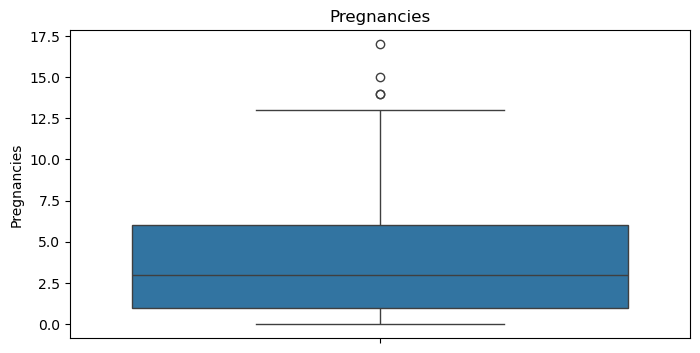

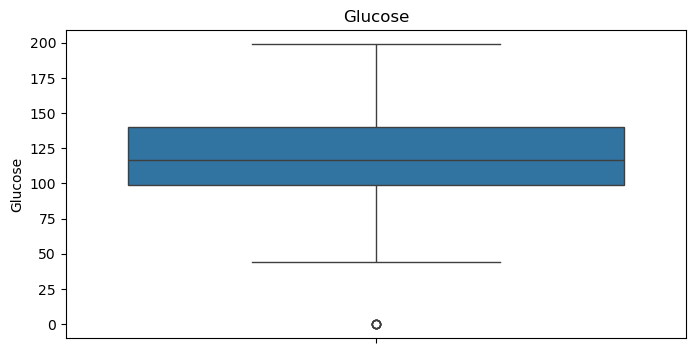

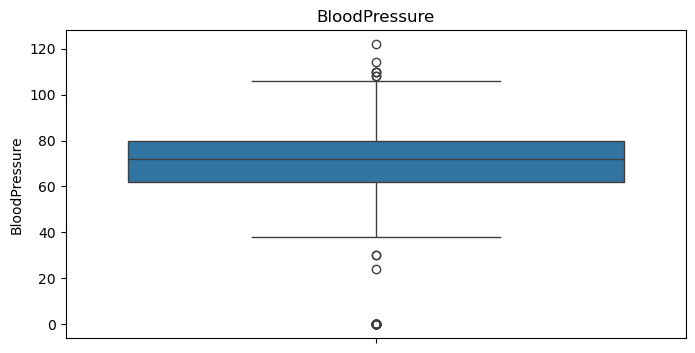

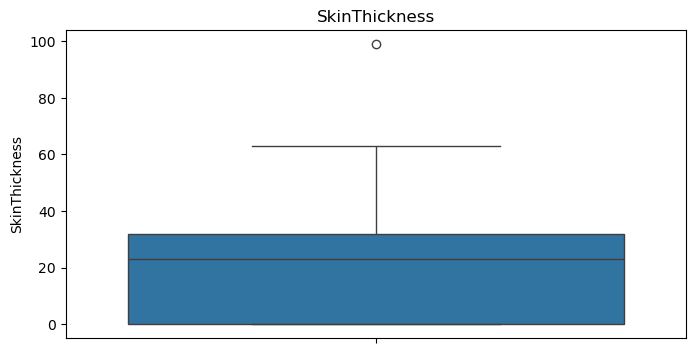

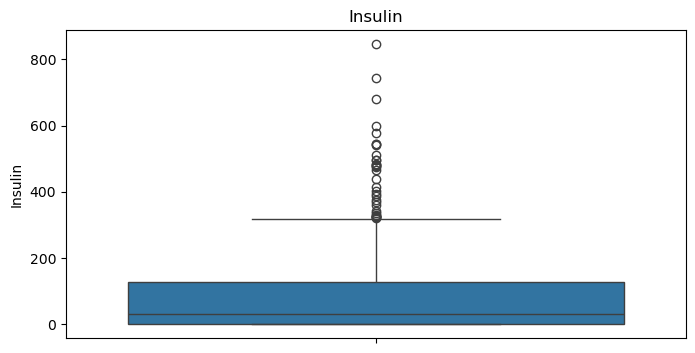

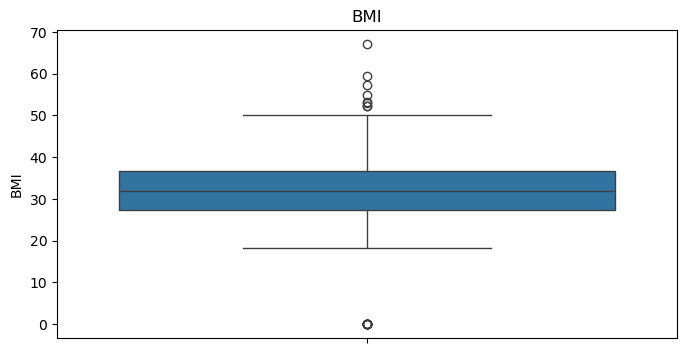

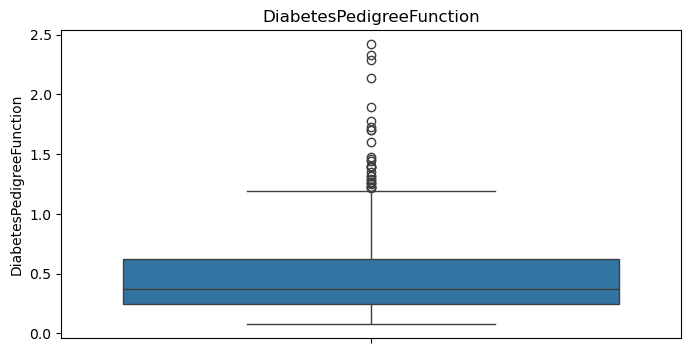

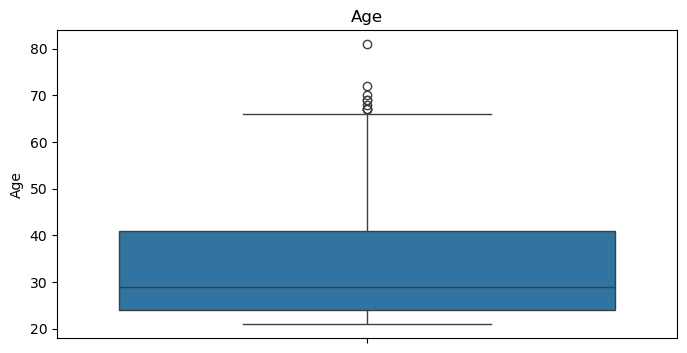

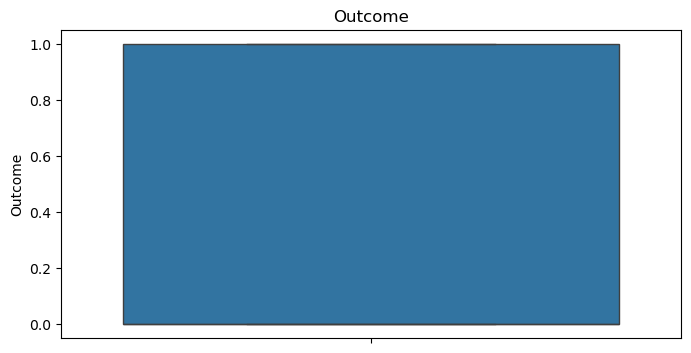

In [7]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [8]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    df[col] = df[col].clip(lower=lower, upper=upper)

- Handled Outliers

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Standardization

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting train-test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=True, random_state=42, test_size=0.2)

### Model Development

#### Logistic Regression

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
y_pred_log = model.predict(X_test)

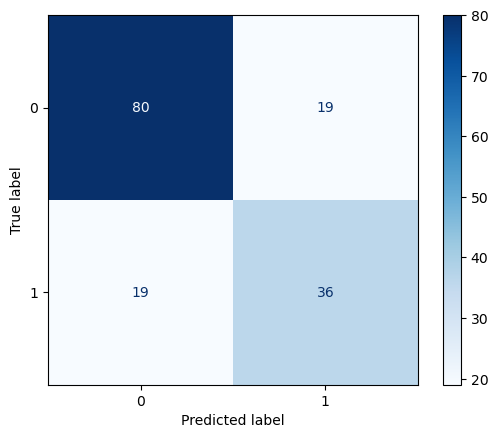

In [14]:
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

#### KNN Classification

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
y_pred_knn = knn.predict(X_test)

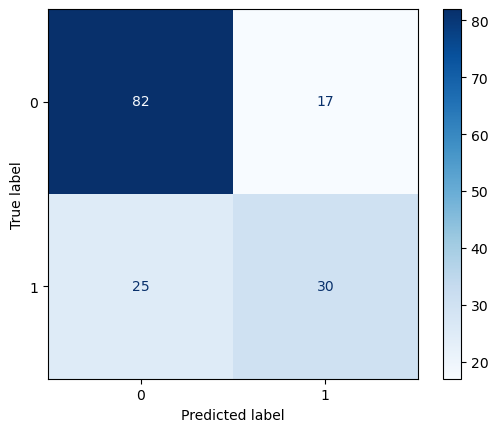

In [17]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

#### Decision Tree Classification

In [18]:
tree = DecisionTreeClassifier(max_depth=5, criterion='gini')
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_pred_tree = tree.predict(X_test)

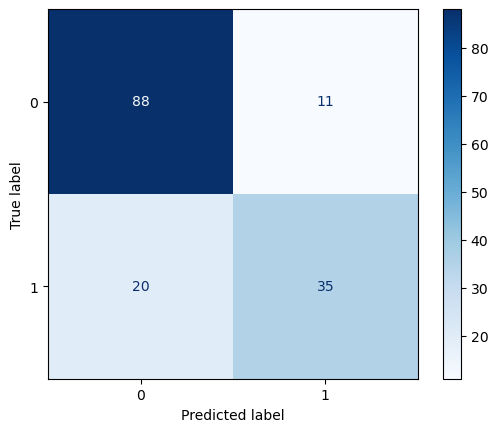

In [20]:
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

#### SVM Classification

In [75]:
svm = SVC(kernel='poly', C=1.9, gamma='scale')
svm.fit(X_train, y_train)

,C,1.9
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [76]:
y_pred_svm = svm.predict(X_test)

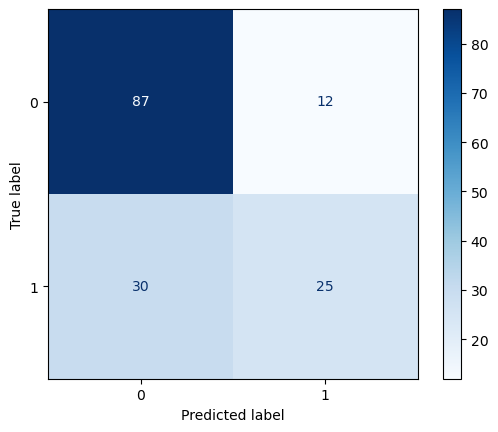

In [77]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Evaluation

#### Logistic Regression

In [78]:
acc = accuracy_score(y_test, y_pred_log)
pre = precision_score(y_test, y_pred_log, average='macro')
rec = recall_score(y_test, y_pred_log, average='macro')
f1 = f1_score(y_test, y_pred_log, average='macro')

In [79]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1 score: ', f1)

Accuracy:  0.7532467532467533
Precision:  0.7313131313131314
Recall:  0.7313131313131314
F1 score:  0.7313131313131314


#### KNN Classification

In [80]:
acc = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average='macro')
rec = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

In [81]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1 score: ', f1)

Accuracy:  0.7272727272727273
Precision:  0.7023265062636708
Recall:  0.6868686868686869
F1 score:  0.692175899486008


#### Decision Tree Classification

In [82]:
acc = accuracy_score(y_test, y_pred_tree)
pre = precision_score(y_test, y_pred_tree, average='macro')
rec = recall_score(y_test, y_pred_tree, average='macro')
f1 = f1_score(y_test, y_pred_tree, average='macro')

In [83]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1 score: ', f1)

Accuracy:  0.7987012987012987
Precision:  0.787842190016103
Recall:  0.7626262626262625
F1 score:  0.7716554264122064


#### SVM Classification

In [84]:
acc = accuracy_score(y_test, y_pred_svm)
pre = precision_score(y_test, y_pred_svm, average='macro')
rec = recall_score(y_test, y_pred_svm, average='macro')
f1 = f1_score(y_test, y_pred_svm, average='macro')

In [85]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1 score: ', f1)

Accuracy:  0.7272727272727273
Precision:  0.7096327096327096
Recall:  0.6666666666666666
F1 score:  0.6745169082125604


### Summary
- Comparitively Decision Tree model is showing more accuracy in predicting the disease
- (F1 score): The model maintains a balanced performance (neither overly cautious nor overly aggressive).